In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import umap.umap_ as umap

# Standardization

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Breast_cancer_data.csv")
numerical = ["mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness"] 

X_train, X_test, y_train, y_test = train_test_split(data[numerical], data["diagnosis"], test_size=0.3, random_state=42, stratify=data["diagnosis"])

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical)

# Principal Component Analysis

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

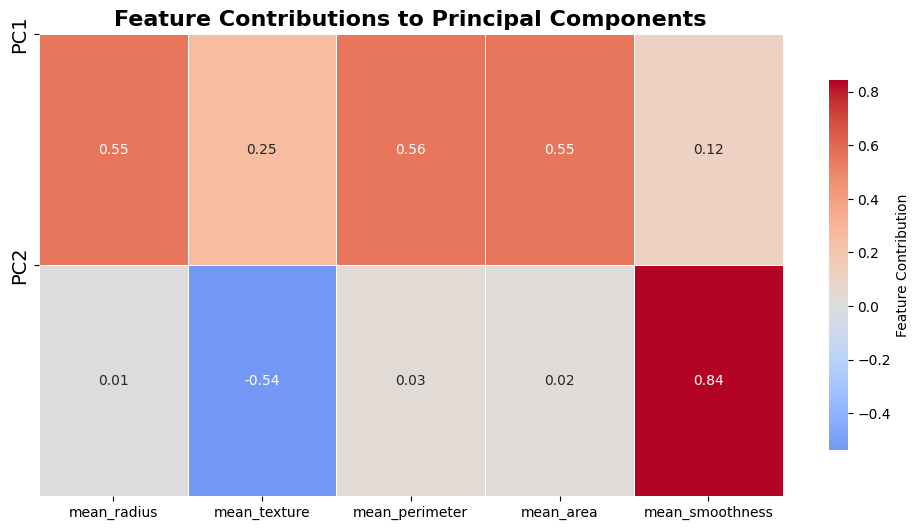

In [4]:
df_comp = pd.DataFrame(pca.components_,  columns=numerical)

plt.figure(figsize=(12,6))

sns.heatmap(df_comp, annot=True, fmt=".2f", cmap="coolwarm",center=0, linewidth=0.5, 
            cbar_kws={"shrink": 0.8, "label": "Feature Contribution"}
    )

plt.yticks(ticks=np.arange(len(["PC1", "PC2"])), labels=["PC1", "PC2"], fontsize=14)
plt.title("Feature Contributions to Principal Components", fontsize=16, fontweight="bold")

plt.gcf().savefig("../images/PCA_heatmap.png", dpi=900, bbox_inches="tight")

plt.show()


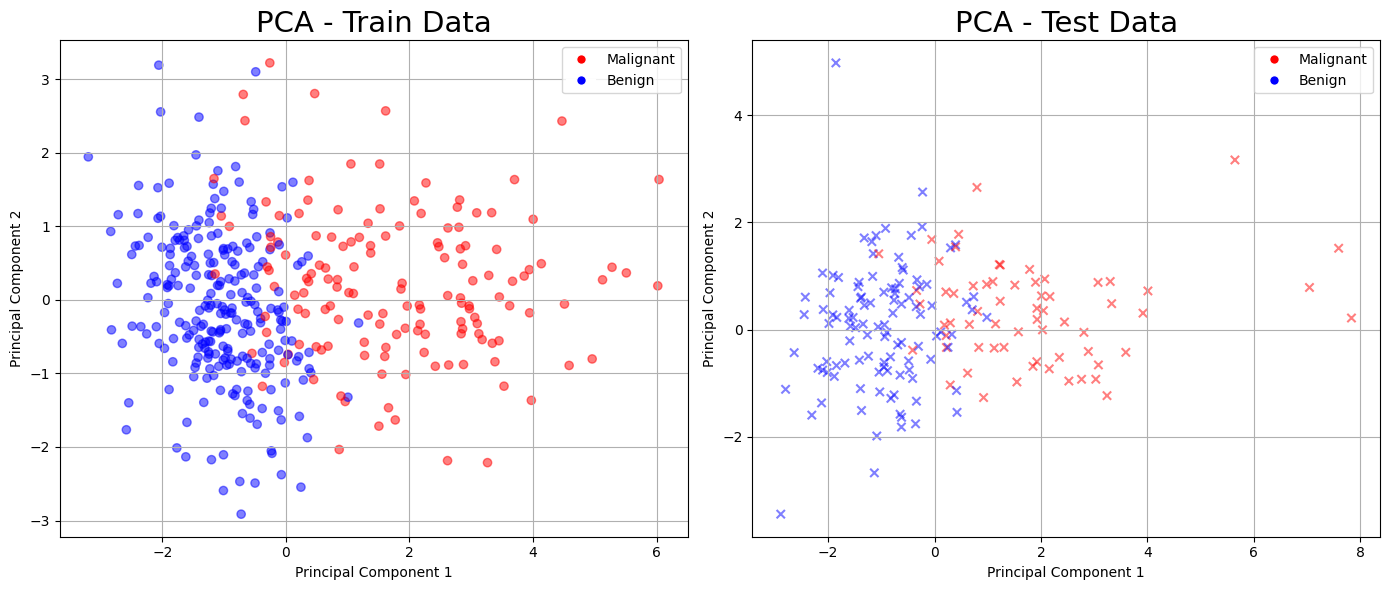

In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

colors = {0: "red", 1: "blue"} 

# Train Data Plot
axes[0].scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train.map(colors), alpha=0.5)
axes[0].set_title("PCA - Train Data", fontsize=21)
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].grid(True)

# Test Data Plot
axes[1].scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test.map(colors), alpha=0.5, marker="x")
axes[1].set_title("PCA - Test Data", fontsize=21)
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].grid(True)

legend_elements = [
    Line2D([0], [0], marker="o", color="w", markerfacecolor="red", markersize=7, label="Malignant"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor="blue", markersize=7, label="Benign")
]

axes[0].legend(handles=legend_elements, loc="upper right")
axes[1].legend(handles=legend_elements, loc="upper right")

plt.tight_layout()

fig.savefig("../images/PCA_Train_Test_Split.png", dpi=900, bbox_inches="tight")

plt.show()

# Multidimensional Scaling (MDS)

In [6]:
X = data[numerical]
y = data["diagnosis"]

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

### MDS with 2 components

In [7]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42, dissimilarity="euclidean")

X_mds_2d = mds.fit_transform(X_scaled)

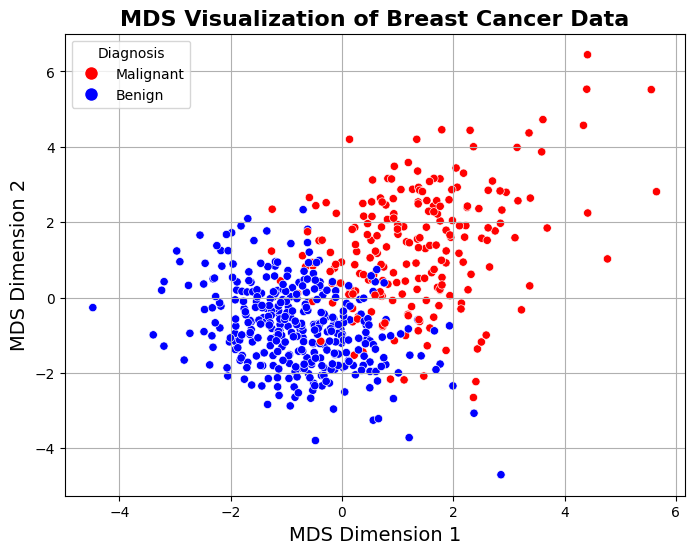

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_mds_2d[:,0], y=X_mds_2d[:,1], hue=y, palette={0:"red", 1:"blue"})

plt.title("MDS Visualization of Breast Cancer Data", fontsize=16, fontweight="bold")
plt.xlabel("MDS Dimension 1", fontsize=14)
plt.ylabel("MDS Dimension 2", fontsize=14)

legend_elements = [
    Line2D([0], [0], marker="o", color="w", markerfacecolor="red", markersize=10, label="Malignant"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor="blue", markersize=10, label="Benign")
]

plt.legend(handles=legend_elements, title="Diagnosis", fontsize=10)
plt.grid(True)

plt.gcf().savefig("../images/MDS_2d.png", dpi=900, bbox_inches="tight")

plt.show()


### MDS with 3 components

In [9]:
from sklearn.manifold import MDS

mds = MDS(n_components=3, random_state=42, dissimilarity="euclidean")

X_mds_3d = mds.fit_transform(X_scaled)

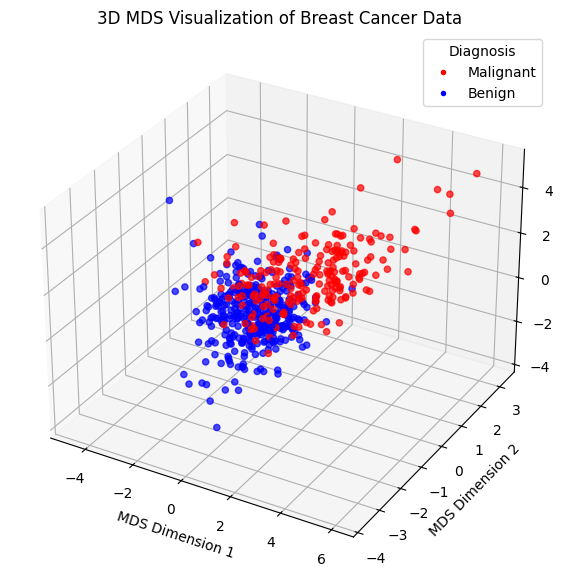

In [10]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_mds_3d[:,0], X_mds_3d[:,1], X_mds_3d[:,2], c=y.map(colors), alpha=0.7)

ax.set_xlabel("MDS Dimension 1")
ax.set_ylabel("MDS Dimension 2")
ax.set_zlabel("MDS Dimension 3")
ax.set_title("3D MDS Visualization of Breast Cancer Data")

legend_labels = {0: "Malignant", 1: "Benign"}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markersize=5, 
                              markerfacecolor="red", label="Malignant"),
                   plt.Line2D([0], [0], marker='o', color='w', markersize=5, 
                              markerfacecolor="blue", label="Benign")]
ax.legend(handles=legend_elements, loc="upper right", title="Diagnosis")

fig.savefig("../images/MDS_3d.png", dpi=900, bbox_inches="tight")

plt.show()

# t-SNE

### t-SNE with 2 components

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=100)
X_tsne_2d = tsne.fit_transform(X_scaled)

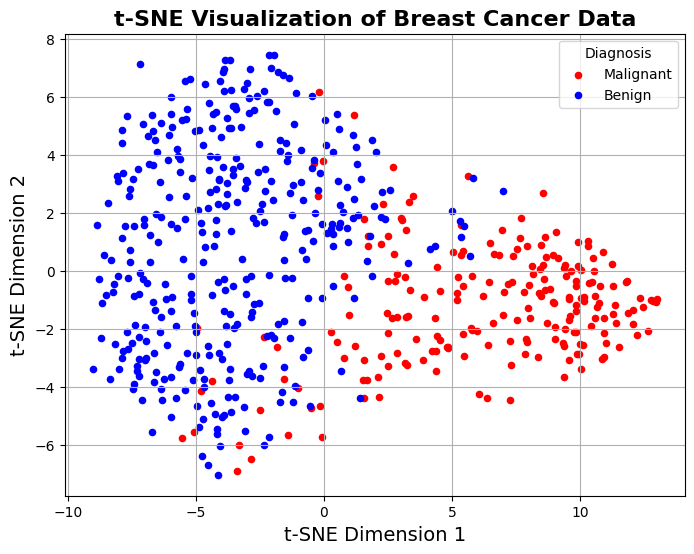

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne_2d[y==0,0], X_tsne_2d[y==0,1], c="red", label="Malignant", s=20)
plt.scatter(X_tsne_2d[y==1,0], X_tsne_2d[y==1,1], c="blue", label="Benign", s=20)

plt.title("t-SNE Visualization of Breast Cancer Data", fontsize=16, fontweight="bold")
plt.xlabel("t-SNE Dimension 1", fontsize=14)
plt.ylabel("t-SNE Dimension 2", fontsize=14)

plt.legend(["Malignant", "Benign"], title="Diagnosis", fontsize=10)
plt.grid(True)

plt.gcf().savefig("../images/t-SNE_2d.png", dpi=900, bbox_inches="tight")

plt.show()

### t-SNE with 3 components

In [13]:
tsne = TSNE(n_components=3, random_state=42, perplexity=100)
X_tsne_3d = tsne.fit_transform(X_scaled)

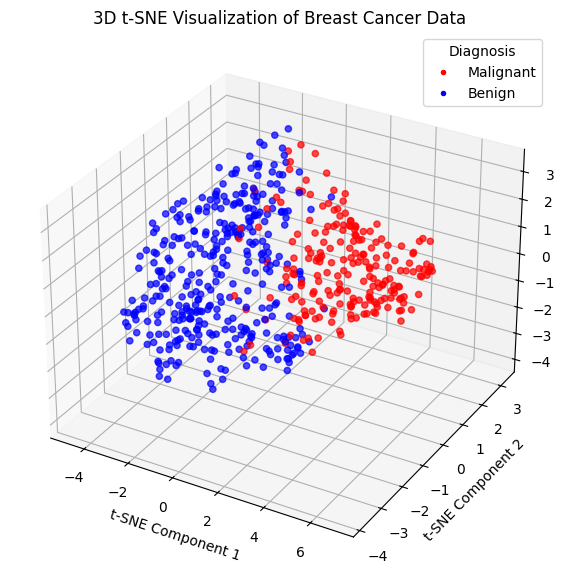

In [14]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], 
                     c=y.map(colors), alpha=0.7)

ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
ax.set_title("3D t-SNE Visualization of Breast Cancer Data")

legend_labels = {0: "Malignant", 1: "Benign"}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markersize=5, 
                              markerfacecolor="red", label="Malignant"),
                   plt.Line2D([0], [0], marker='o', color='w', markersize=5, 
                              markerfacecolor="blue", label="Benign")]
ax.legend(handles=legend_elements, loc="upper right", title="Diagnosis")

fig.savefig("../images/t-SNE_3d.png", dpi=900, bbox_inches="tight")

plt.show()


# UMAP

### UMAP with 2 components

In [ ]:
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_scaled)

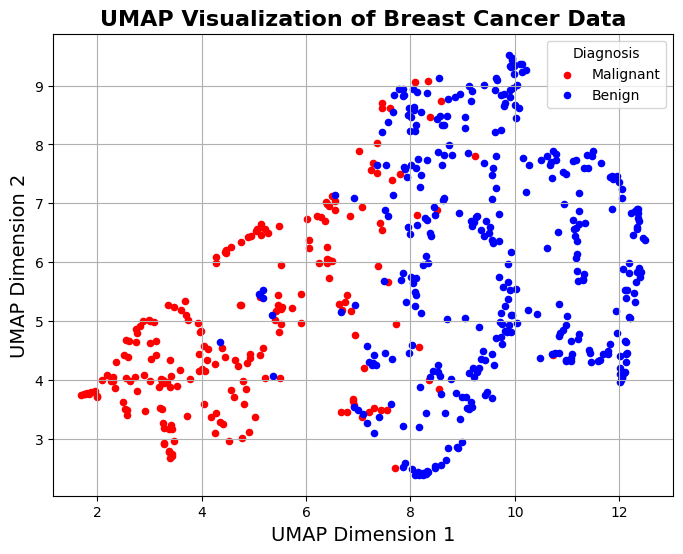

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[y==0, 0], X_umap_2d[y==0, 1], c="red", label="Malignant", s=20)
plt.scatter(X_umap_2d[y==1, 0], X_umap_2d[y==1, 1], c="blue", label="Benign", s=20)

plt.title("UMAP Visualization of Breast Cancer Data", fontsize=16, fontweight="bold")
plt.xlabel("UMAP Dimension 1", fontsize=14)
plt.ylabel("UMAP Dimension 2", fontsize=14)

plt.legend(title="Diagnosis", fontsize=10)
plt.grid(True)

plt.gcf().savefig("../images/UMAP_2d.png", dpi=900, bbox_inches="tight")

plt.show()

### UMAP with 3 components

In [ ]:
umap_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_scaled)

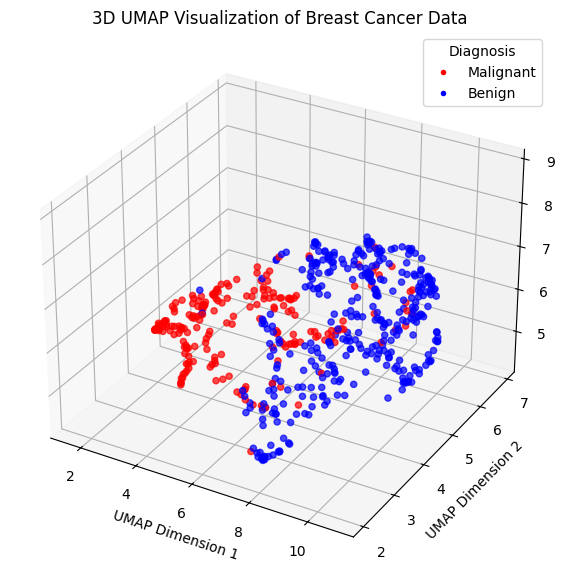

In [18]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_umap_3d[:,0], X_umap_3d[:,1], X_umap_3d[:,2], c=y.map(colors), alpha=0.7)

ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")
ax.set_title("3D UMAP Visualization of Breast Cancer Data")

legend_labels = {0: "Malignant", 1: "Benign"}
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markersize=5, 
                              markerfacecolor="red", label="Malignant"),
                   plt.Line2D([0], [0], marker='o', color='w', markersize=5, 
                              markerfacecolor="blue", label="Benign")]
ax.legend(handles=legend_elements, loc="upper right", title="Diagnosis")

fig.savefig("../images/UMAP_3d.png", dpi=900, bbox_inches="tight")

plt.show()